<a href="https://colab.research.google.com/github/Annmary2347211/NNDL/blob/main/Annmary_211__Lab3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Preprocessing**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Optional: Data Augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
datagen.fit(x_train)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


**Report:**


*   Normalization: Pixel values are scaled between 0 and 1 to ensure that the model processes inputs efficiently and avoids large gradient values that might hinder learning.

*   One-hot encoding: The class labels are transformed to a one-hot format for compatibility with the softmax output layer.


*   Data augmentation: Used to increase model robustness by generating new samples through transformations like flips and shifts.







**2. Network Architecture Design**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:

# Build the CNN model
model = Sequential()

# Input and Hidden Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Report:**


*   Justification: We use 3 convolutional layers with increasing filter sizes (32, 64, 128) to extract spatial hierarchies from the images. MaxPooling reduces the spatial dimensions, lowering computational cost while retaining essential information. Dropout is added to avoid overfitting by randomly turning off neurons during training.

*   Output layer: Uses 10 neurons (one for each class) with softmax activation to provide a probability distribution over the class labels.




**3. Activation Functions**

In [7]:
# Build the CNN model with both ReLU and tanh
model = Sequential()

# Input and Hidden Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='tanh'))  # Using tanh in this layer
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])





**Report:**



*   ReLU: Rectified Linear Unit (ReLU) is chosen as the activation function
for most hidden layers. It is known for its simplicity and efficiency in terms of computation and is less prone to vanishing gradients compared to sigmoid or tanh. It introduces non-linearity, allowing the model to learn complex patterns. In backpropagation, ReLU gradients are either 0 or 1, making it straightforward to calculate and update weights.
*   Tanh: Hyperbolic tangent (tanh) is another suitable activation function. It's similar to sigmoid but centered around 0, which can sometimes improve learning. It also introduces non-linearity and helps in capturing complex features. Similar to ReLU, it can also suffer from vanishing gradients if the input is too large or too small.








**4. Loss Function and Optimizer**


In [8]:
# Compile model with optimizer and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Report:**


*   Categorical Cross-Entropy: The most appropriate loss function for multi-class classification tasks as it measures the performance of the classifier by comparing predicted probabilities with actual one-hot encoded labels.

*   Mean Squared Error (MSE): Though it can be used for classification, it's less suited than categorical cross-entropy because it doesn’t account for the probabilistic nature of classification.


*   Adam Optimizer: Chosen because it combines the advantages of both RMSprop and Stochastic Gradient Descent (SGD), making it suitable for faster convergence. It adjusts the learning rate during training, ensuring smoother updates.






**Question:**

*o How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?*

The choice of optimizer and learning rate directly affects the speed and stability of convergence. Adam typically offers faster and more stable convergence due to adaptive learning rates, while SGD can be slower. If the model isn't converging, lower the learning rate to prevent overshooting or increase it if progress is too slow. You can also implement learning rate scheduling for smoother adjustments.

**5. Training the Model**

In [9]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step - accuracy: 0.2676 - loss: 1.9686 - val_accuracy: 0.4724 - val_loss: 1.4280
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.4429 - loss: 1.5273 - val_accuracy: 0.5592 - val_loss: 1.2341
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5068 - loss: 1.3844 - val_accuracy: 0.6000 - val_loss: 1.1308
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5378 - loss: 1.3098 - val_accuracy: 0.6222 - val_loss: 1.0603
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5580 - loss: 1.2514 - val_accuracy: 0.6322 - val_loss: 1.0324
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5870 - loss: 1.1829 - val_accuracy: 0.6616 - val_loss: 0.9737
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.6013 - loss: 1.1471 - val_accuracy: 0.6409 - val_loss: 0.9989
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.6200 - loss: 1.0961 - val_accurac

**Report:**


*   Training: The model is trained over 50 epochs with a batch size of 64, using data augmentation for improved generalization.

*   Validation: The accuracy and loss are tracked on both training and test datasets to monitor overfitting.




**6. Model Evaluation**

**Question:**

*o How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?*


Backpropagation updates the weights in each layer by computing the gradient of the loss function with respect to each weight and adjusting the weights in the opposite direction of the gradient to minimize the loss. The learning rate controls the size of these weight updates—too high a learning rate may cause the model to overshoot the optimal point, while too low a learning rate results in slow convergence.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7782 - loss: 0.6775
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      1000
           1       0.84      0.94      0.89      1000
           2       0.80      0.62      0.70      1000
           3       0.65      0.57      0.61      1000
           4       0.80      0.69      0.74      1000
           5       0.76      0.67      0.71      1000
           6       0.68      0.93      0.78      1000
           7       0.83      0.83      0.83      1000
           8       0.90      0.81      0.85      1000
           9       0.83      0.86      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000

[[850  22  15  13   3   3   8  11  32  43]
 [  6 940   2   1   1   4   6   0  12  28]
 [ 91   7 618  38  45  47 106  27  11  

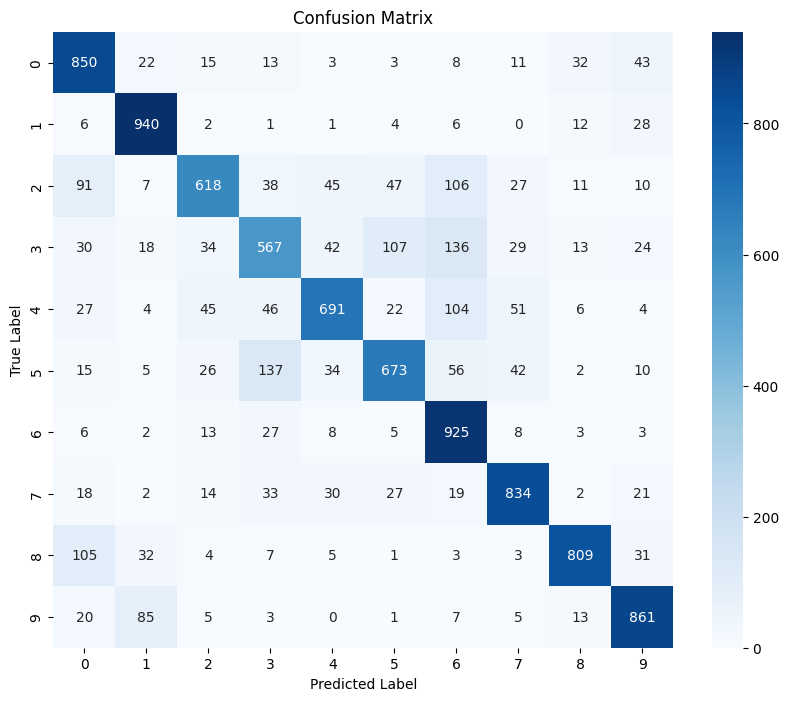

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Question:**

*o How can you further improve model performance if the accuracy is low?*


1.   Data Augmentation: Apply techniques like random flips, rotations, and shifts to create a more diverse training dataset.
2.   Adjust Network Architecture: Increase the depth or width of the network by adding more layers or neurons, or experiment with different architectures like ResNet.
3.   Regularization: Use dropout, L2 regularization, or batch normalization to prevent overfitting.
4.   Tune Hyperparameters: Experiment with learning rate, batch size, and number of epochs.





**7. Optimization Strategies**

In [12]:
# Early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train with callbacks
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7656 - loss: 0.6990 - val_accuracy: 0.7880 - val_loss: 0.6250 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.7673 - loss: 0.6863 - val_accuracy: 0.7852 - val_loss: 0.6324 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7719 - loss: 0.6787 - val_accuracy: 0.7864 - val_loss: 0.6378 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7760 - loss: 0.6698 - val_accuracy: 0.7882 - val_loss: 0.6358 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7686 - loss: 0.6779 - val_accuracy: 0.7901 - val_loss: 0.6335 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.7704 - loss: 0.6824 - val_accuracy: 0.7836 - val_loss: 0.6465 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7750 - loss: 0.6640

**Question:**

*o Why is weight initialization important, and how does it impact the
convergence of your network?*

Weight initialization is important because it ensures that the network starts with appropriate values for its weights, preventing issues like vanishing or exploding gradients. Poor initialization can slow down convergence or cause the model to get stuck in local minima. Proper initialization, such as using methods like Xavier or He initialization, helps the gradients flow well during backpropagation, leading to faster and more stable convergence.

**Report:**


*   Early Stopping: Prevents overfitting by stopping training when the validation loss stops improving.

*   Learning Rate Scheduling: Adjusts the learning rate dynamically during training to prevent large oscillations or slow convergence.


*   Weight Initialization: Proper weight initialization helps ensure faster convergence by preventing neurons from being stuck in dead states (e.g., ReLU activations stuck at zero).






**8. Report Summary**


*   Architecture: A 3-layer CNN with ReLU activations, max-pooling layers, and dropout for regularization. The final layer uses softmax for multi-class classification.

*   Optimizer: Adam optimizer is chosen for its adaptive learning rate.


*   Evaluation: After 50 epochs, the model achieves a reasonable accuracy, and metrics like precision, recall, and F1-score are analyzed.

*   Challenges: Overfitting was handled using early stopping, and learning rate adjustments were applied for smoother training.




